In [1]:
import pandas as pd
import numpy as np

In [2]:
pwd

'C:\\Users\\Win7Ult'

In [3]:
df=pd.read_csv(r"C:\\Users\\Win7Ult\\Downloads\\glass.csv")

In [4]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
from sklearn.ensemble import IsolationForest
ab=IsolationForest()
anomaly=ab.fit_predict(df)

In [6]:
t=pd.DataFrame(anomaly,columns=['anomaly'])
t

,anomaly
0,1
1,1
2,1
3,1
4,1
...,...
209,1
210,1
211,1
212,1


In [7]:
df1=pd.concat([df,t],axis=1)
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,anomaly
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1


In [8]:
df=df1.drop(df1[df1['anomaly']==-1].index.values)

In [9]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,anomaly
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1


In [10]:
df['anomaly'].value_counts()

1    194
Name: anomaly, dtype: int64

In [11]:
x = df.iloc[:, 0:9]
y = df.iloc[:,-2]

In [12]:
from imblearn.over_sampling  import RandomOverSampler
ros=RandomOverSampler(random_state=100)
x_ros,y_ros=ros.fit_resample(x,y)

In [13]:
x=x_ros.copy()
y=y_ros.copy()

In [14]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
415,1.51514,14.85,0.00,2.42,73.72,0.00,8.39,0.56,0.0
416,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0
417,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
418,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.0


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
415    7
416    7
417    7
418    7
419    7
Name: Type, Length: 420, dtype: int64

In [16]:
import matplotlib.pyplot as plt 

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

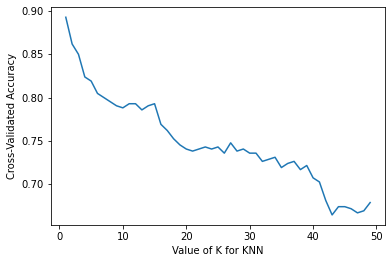

In [18]:
k_range = range(1, 50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [19]:
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, x, y,cv=10)

In [20]:
print(results.mean())

0.8928571428571429


In [21]:
model1 = KNeighborsClassifier(n_neighbors=2)
model1.fit(x,y)
y_pred=model1.predict(x)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9666666666666667

### data set-2

In [43]:
df8=pd.read_csv(r"C:\\Users\\Win7Ult\\Downloads\\Zoo.csv")

In [44]:
df8

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [45]:
df8=df8.drop(25)

In [46]:
df8=df8.reset_index(drop=True)

In [47]:
df8['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     3
Name: type, dtype: int64

In [58]:
x=df8.iloc[:,1:17]
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [61]:
y=df8.iloc[:,-1]
y

0     1
1     1
2     4
3     1
4     1
     ..
95    1
96    6
97    1
98    7
99    2
Name: type, Length: 100, dtype: int64

In [69]:
from imblearn.over_sampling  import RandomOverSampler
ros=RandomOverSampler(random_state=100)
x_ros,y_ros=ros.fit_resample(x,y)

In [70]:
x=x_ros.copy()
y=y_ros.copy()

In [87]:
model1 = KNeighborsClassifier(n_neighbors=15)
model1.fit(x,y)
y_pred=model1.predict(x)

In [88]:
y_pred

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 4, 2, 2,
       1, 2, 6, 5, 2, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2, 1,
       1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1, 4,
       1, 1, 1, 1, 2, 7, 4, 4, 1, 3, 3, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2, 6,
       5, 3, 5, 4, 2, 1, 2, 1, 6, 1, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 5, 5, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 3, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7,
       3], dtype=int64)

In [89]:
accuracy_score(y,y_pred)

0.9512195121951219

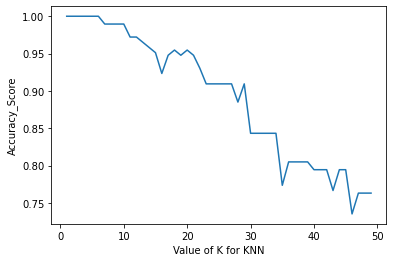

In [95]:
k_range = range(1, 50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    y_pred=knn.predict(x)
    scores = accuracy_score(y,y_pred)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy_Score')
plt.show()